In [1]:
pylab inline
# /bin/rm ~/.cache/fontconfig/*


/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [158]:
try:
    reload(dc)
    print  'dc reloaded'
except Exception:
    print 'dc not loaded yet'
    

dc reloaded


In [159]:
WORDSIZE = 32
import dnnConnectivityAndMemoryAllocation as dc
import numpy as np

# Create memory
mainMemoryConfig = dc.MemoryConfiguration(2,32,8,4096)
mainMemory = dc.Memory(mainMemoryConfig)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
#network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

network.addLayer('Input',          224, 224,    3                       ) #    3 
network.addLayer('Convolutional',   55,  55,    4,    8,   8,    3,   4 ) #   96,
#network.addLayer('Input',           55,  55,    4,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    8,    5,   5,    4,   2 ) #  256,
#network.addLayer('Convolutional',   13,  13,    4,    3,   3,    8,   2 ) #  384,
#network.addLayer('Convolutional',   13,  13,    2,    3,   3,    4,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,

   

network.assignPEs('linearAll')






Layer  0  left Kernel offset is  0 , top Kernel offset is  0
Layer  1  left Kernel offset is  0 , top Kernel offset is  0
Layer  2  left Kernel offset is  -1 , top Kernel offset is  -1


In [160]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

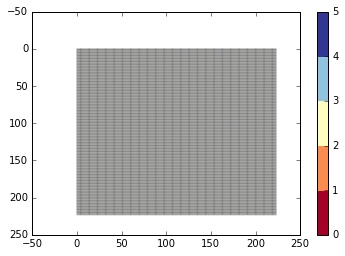

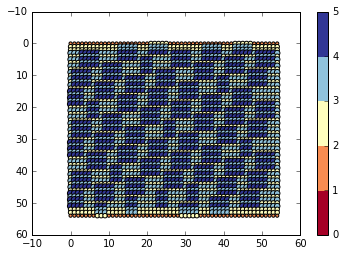

In [161]:
for layerID in range(0,network.numberOfLayers-1):
  pass
  network.Layers[layerID].displayTargetPECounts()


In [162]:
layerID = 0
numOfPEs = network.Layers[layerID].getTargetPECounts()



In [163]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
#print numOfPEs
#print numOfPEs.shape
np.set_printoptions(threshold=1000)


In [164]:
#coords = np.array([[0,0],[10,10]])
#network.Layers[1].displayTargetPECountsRegion(coords)

In [165]:
pLine = ''
for layerID in range(1,network.numberOfLayers):
  for peY in range(network.peY) :
    for peX in range(network.peX) :
      nv = network.peArray.pe[peY][peX].findROI(layerID)
      pLine = pLine + '{0:12},{1:12}  |  '.format(nv[0], nv[1])
      network.managerArray.manager[peY][peX].memCpyROI(layerID)
    pLine = pLine + '\n'
  pLine = pLine + '\n------------------------------------------------------------'
#print pLine
#print nv[0]
#print nv[1]

  


In [166]:
layerID = 1
allocationOptions = dc.MemoryAllocationOptions(0,1,0,2,0,2,0,1,'Y')
network.managerArray.manager[0][0].allocateMemory(mainMemory, layerID, allocationOptions)
for y in range(network.managerArray.manager[0][0].roiCells[layerID][0].__len__()):
  for x in range(network.managerArray.manager[0][0].roiCells[layerID][0][0].__len__()):
    for z in range(network.managerArray.manager[0][0].roiCells[layerID].__len__()):
        pass
        #print network.managerArray.manager[0][0].roiCells[layerID][z][y][x]


In [167]:
pLine = ''
for layerID in range(0,network.numberOfLayers):
    for y in range(network.peY) :
        for x in range(network.peX) :
            #print network.managerArray.manager[y][x]
            #print network.managerArray.manager[y][x].pe
            pLine = pLine + '{0:5}'.format(str(network.managerArray.manager[y][x].pe.cellsProcessed[layerID].__len__()))
            #for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] : 
            #    nv = c.findROI()
            #    print c
        pLine = pLine + '\n'
    pLine = pLine + '\n\n'
#print pLine

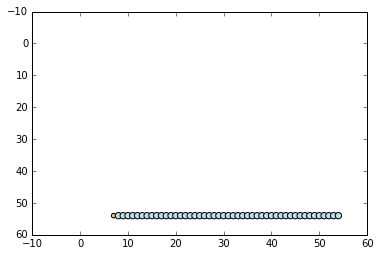

3
[<matplotlib.figure.Figure object at 0x1383a5990>, <matplotlib.collections.PathCollection object at 0x1386c40d0>, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 4, 4]])]


In [171]:
coords = np.array([[0,0],[54,54]])
for yPe in range(8):
    for xPe in range(8):
        pass
        #network.peArray.pe[yPe][xPe].displayROIgridRegion(1, coords)
        #network.peArray.pe[yPe][xPe].displayROIgrid(1)
        #network.peArray.pe[yPe][xPe].displayCellsProcessed(1) 

a = network.peArray.pe[yPe][xPe].displayCellsProcessed(1,noDisplay=False) 
print a.__len__()
print a